# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

02:28:51 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=667915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=598217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=967734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=583053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=759725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=361296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

02:28:53 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=343697;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=237075;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=533005;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=296075;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

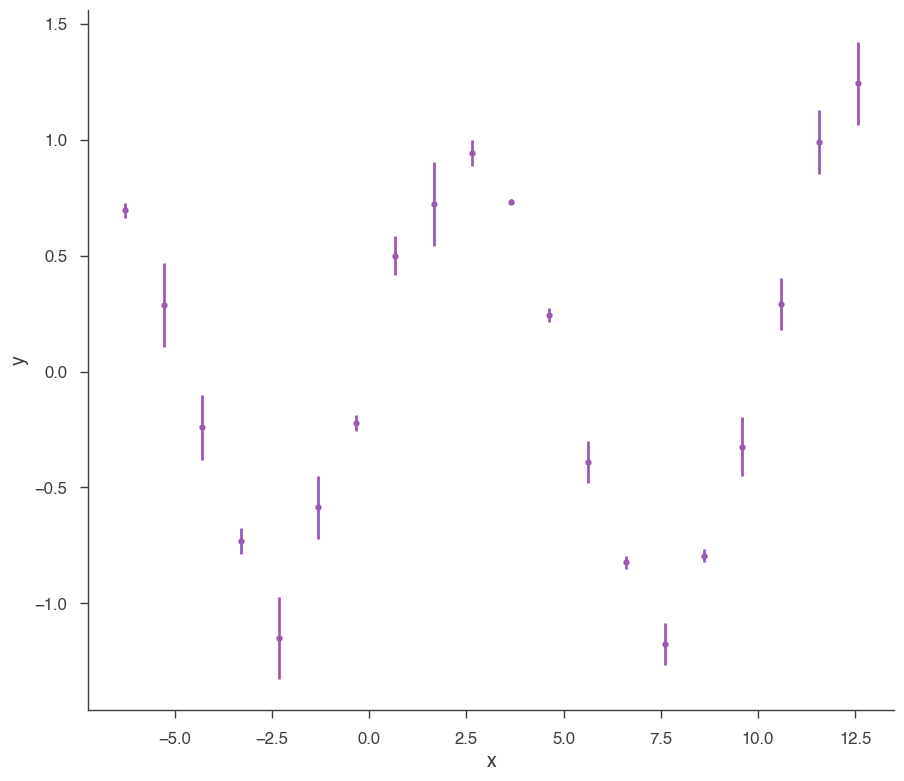

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

02:28:54 INFO      sampler set to emcee                                                    ]8;id=555014;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=416662;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

02:28:56 INFO      Mean acceptance fraction: 0.7091999999999999                                ]8;id=117128;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=793847;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

02:28:57 INFO      fit restored to maximum of posterior                                         ]8;id=959076;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=532432;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=946961;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=705477;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.74 +/- 0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.494498
total,-11.494498


Values of statistical measures:

,statistical measures
AIC,27.694879
BIC,28.980461
DIC,27.050756
PDIC,2.030921


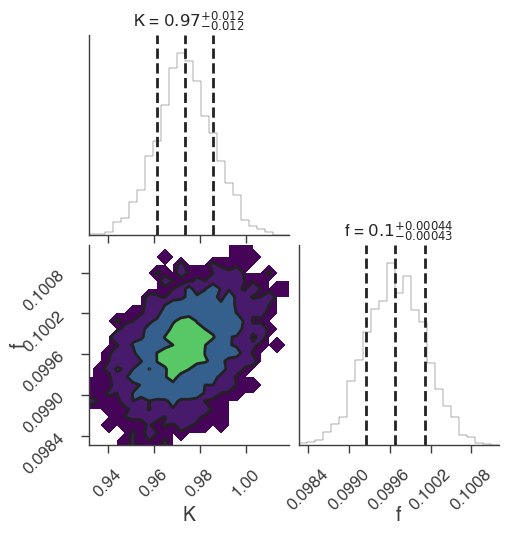

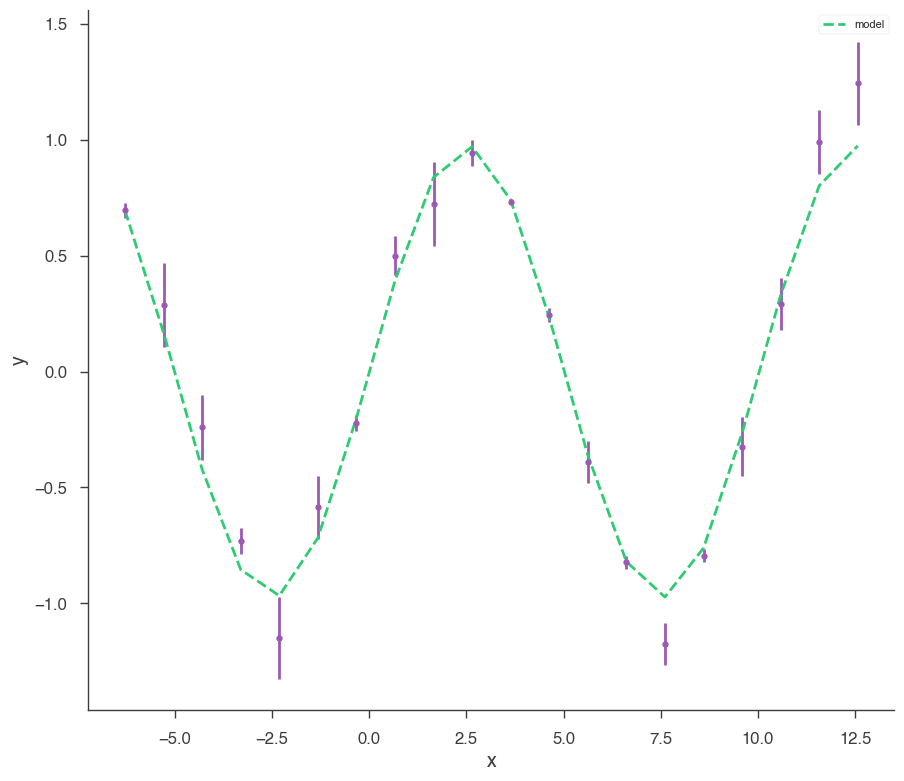

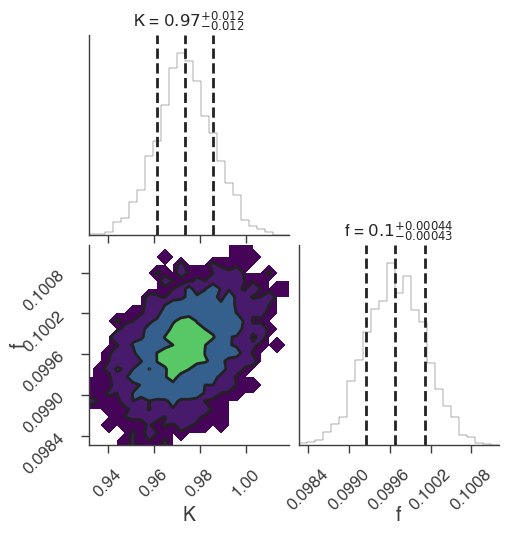

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

02:28:58 INFO      sampler set to multinest                                                ]8;id=961106;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=164267;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -21.669771155599211      +/-  0.15131597881178493     
 Total Likelihood Evaluations:         5877
 Sampling finished. Exiting MultiNest



         INFO      fit restored to maximum of posterior                                         ]8;id=386997;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=324971;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=934567;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=795635;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.74 -0.12 +0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.495482
total,-11.495482


Values of statistical measures:

,statistical measures
AIC,27.696847
BIC,28.982429
DIC,27.080396
PDIC,2.044401
log(Z),-9.411062


02:28:59 INFO      deleting the chain directory chains                                     ]8;id=199826;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=776862;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

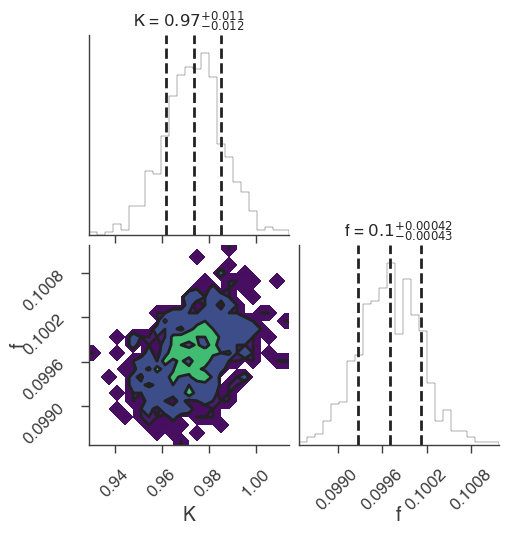

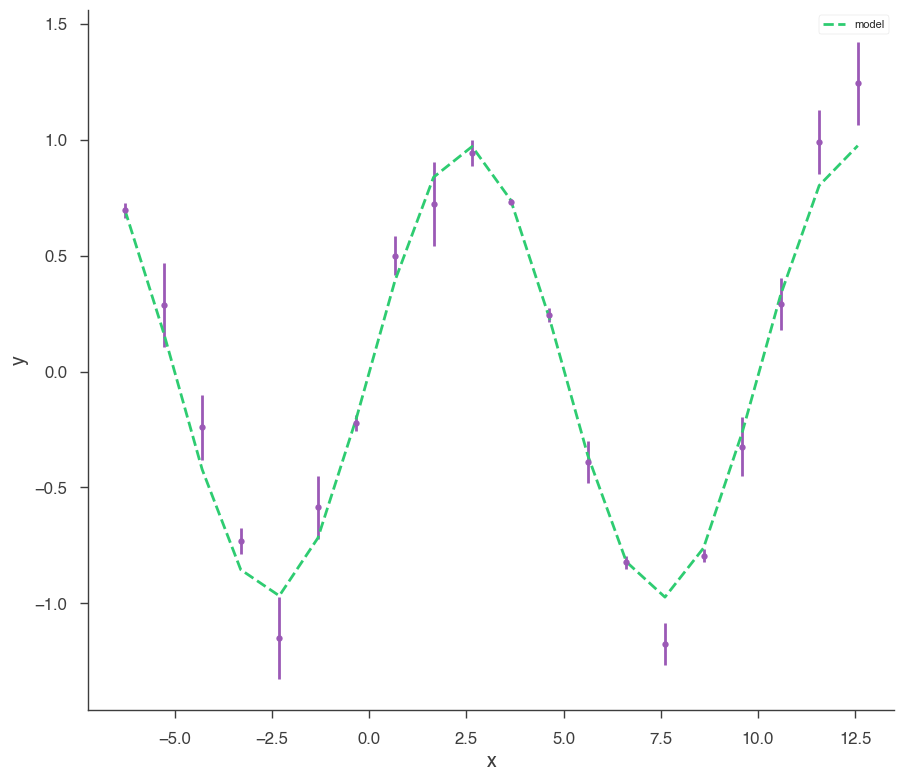

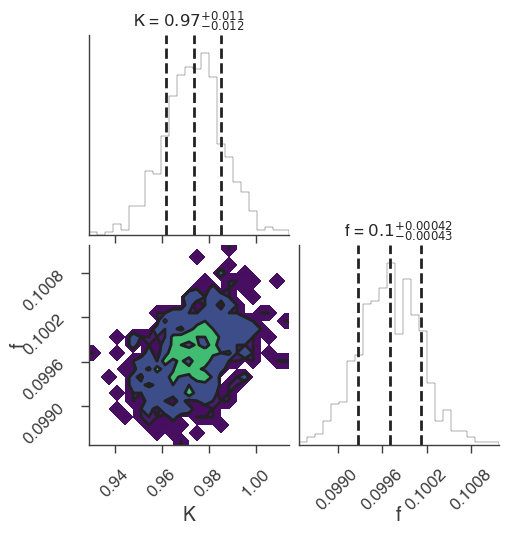

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=762280;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=453486;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

242it [00:00, 2416.83it/s, bound: 0 | nc: 5 | ncall: 751 | eff(%): 32.224 | loglstar:   -inf < -5610.641 <    inf | logz: -5617.930 +/-  0.135 | dlogz: 5612.538 >  0.409]

484it [00:00, 2063.04it/s, bound: 0 | nc: 5 | ncall: 1335 | eff(%): 36.255 | loglstar:   -inf < -3535.293 <    inf | logz: -3543.123 +/-  0.138 | dlogz: 3525.922 >  0.409]

694it [00:00, 1467.38it/s, bound: 0 | nc: 1 | ncall: 2287 | eff(%): 30.345 | loglstar:   -inf < -2478.058 <    inf | logz: -2486.303 +/-  0.139 | dlogz: 2472.750 >  0.409]

856it [00:00, 1177.23it/s, bound: 0 | nc: 4 | ncall: 3581 | eff(%): 23.904 | loglstar:   -inf < -1939.657 <    inf | logz: -1948.365 +/-  0.145 | dlogz: 1934.986 >  0.409]

987it [00:00, 1011.13it/s, bound: 0 | nc: 1 | ncall: 4969 | eff(%): 19.863 | loglstar:   -inf < -1368.694 <    inf | logz: -1377.842 +/-  0.151 | dlogz: 1368.775 >  0.409]

1097it [00:01, 756.94it/s, bound: 0 | nc: 19 | ncall: 6694 | eff(%): 16.388 | loglstar:   -inf < -937.270 <    inf | logz: -945.939 +/-  0.142 | dlogz: 930.254 >  0.409]  

1184it [00:01, 642.47it/s, bound: 0 | nc: 15 | ncall: 8651 | eff(%): 13.686 | loglstar:   -inf < -736.791 <    inf | logz: -744.982 +/-  0.137 | dlogz: 728.436 >  0.409]

1257it [00:01, 577.65it/s, bound: 0 | nc: 23 | ncall: 10334 | eff(%): 12.164 | loglstar:   -inf < -649.474 <    inf | logz: -658.020 +/-  0.143 | dlogz: 641.582 >  0.409]

1320it [00:01, 488.81it/s, bound: 0 | nc: 29 | ncall: 12239 | eff(%): 10.785 | loglstar:   -inf < -570.243 <    inf | logz: -579.721 +/-  0.148 | dlogz: 563.773 >  0.409]

1373it [00:01, 355.16it/s, bound: 1 | nc: 1 | ncall: 13614 | eff(%): 10.085 | loglstar:   -inf < -510.913 <    inf | logz: -519.959 +/-  0.144 | dlogz: 504.662 >  0.409] 

1590it [00:02, 640.87it/s, bound: 1 | nc: 4 | ncall: 13966 | eff(%): 11.385 | loglstar:   -inf < -322.040 <    inf | logz: -331.474 +/-  0.146 | dlogz: 315.460 >  0.409]

1703it [00:02, 645.19it/s, bound: 2 | nc: 1 | ncall: 14206 | eff(%): 11.988 | loglstar:   -inf < -250.011 <    inf | logz: -259.921 +/-  0.151 | dlogz: 244.773 >  0.409]

1928it [00:02, 946.64it/s, bound: 2 | nc: 1 | ncall: 14529 | eff(%): 13.270 | loglstar:   -inf < -159.345 <    inf | logz: -168.777 +/-  0.147 | dlogz: 152.519 >  0.409]

2057it [00:02, 869.28it/s, bound: 3 | nc: 1 | ncall: 14806 | eff(%): 13.893 | loglstar:   -inf < -119.631 <    inf | logz: -129.402 +/-  0.148 | dlogz: 112.791 >  0.409]

2275it [00:02, 1132.42it/s, bound: 3 | nc: 2 | ncall: 15098 | eff(%): 15.068 | loglstar:   -inf < -74.438 <    inf | logz: -84.231 +/-  0.150 | dlogz: 66.993 >  0.409]  

2417it [00:02, 997.84it/s, bound: 4 | nc: 1 | ncall: 15411 | eff(%): 15.684 | loglstar:   -inf < -54.804 <    inf | logz: -64.467 +/-  0.149 | dlogz: 46.816 >  0.409] 

2646it [00:02, 1270.34it/s, bound: 4 | nc: 3 | ncall: 15738 | eff(%): 16.813 | loglstar:   -inf < -35.445 <    inf | logz: -45.191 +/-  0.150 | dlogz: 26.929 >  0.409]

2800it [00:03, 1081.67it/s, bound: 5 | nc: 3 | ncall: 16042 | eff(%): 17.454 | loglstar:   -inf < -28.562 <    inf | logz: -38.234 +/-  0.147 | dlogz: 19.739 >  0.409]

3010it [00:03, 1296.75it/s, bound: 5 | nc: 12 | ncall: 16358 | eff(%): 18.401 | loglstar:   -inf < -21.272 <    inf | logz: -31.064 +/-  0.149 | dlogz: 12.045 >  0.409]

3165it [00:03, 1123.38it/s, bound: 6 | nc: 1 | ncall: 16668 | eff(%): 18.988 | loglstar:   -inf < -18.415 <    inf | logz: -28.228 +/-  0.148 | dlogz:  8.815 >  0.409] 

3363it [00:03, 1307.27it/s, bound: 6 | nc: 1 | ncall: 17029 | eff(%): 19.749 | loglstar:   -inf < -15.425 <    inf | logz: -25.327 +/-  0.149 | dlogz:  5.425 >  0.409]

3516it [00:03, 1146.04it/s, bound: 7 | nc: 2 | ncall: 17302 | eff(%): 20.321 | loglstar:   -inf < -14.224 <    inf | logz: -24.031 +/-  0.148 | dlogz:  3.761 >  0.409]

3709it [00:03, 1317.87it/s, bound: 7 | nc: 4 | ncall: 17657 | eff(%): 21.006 | loglstar:   -inf < -13.129 <    inf | logz: -22.953 +/-  0.148 | dlogz:  2.283 >  0.409]

3860it [00:03, 1148.28it/s, bound: 8 | nc: 1 | ncall: 17909 | eff(%): 21.553 | loglstar:   -inf < -12.668 <    inf | logz: -22.424 +/-  0.148 | dlogz:  1.517 >  0.409]

4064it [00:04, 1347.42it/s, bound: 8 | nc: 1 | ncall: 18269 | eff(%): 22.245 | loglstar:   -inf < -12.203 <    inf | logz: -21.972 +/-  0.148 | dlogz:  0.859 >  0.409]

4217it [00:04, 1197.43it/s, bound: 9 | nc: 1 | ncall: 18518 | eff(%): 22.772 | loglstar:   -inf < -11.982 <    inf | logz: -21.753 +/-  0.148 | dlogz:  0.557 >  0.409]

4327it [00:04, 996.45it/s, +400 | bound: 9 | nc: 1 | ncall: 19082 | eff(%): 25.302 | loglstar:   -inf < -11.521 <    inf | logz: -21.290 +/-  0.148 | dlogz:  0.001 >  0.409]

02:29:04 INFO      fit restored to maximum of posterior                                         ]8;id=609021;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=295678;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=519850;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=314340;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.74 +/- 0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.494572
total,-11.494572


Values of statistical measures:

,statistical measures
AIC,27.695026
BIC,28.980608
DIC,26.952840
PDIC,1.981862
log(Z),-9.246311


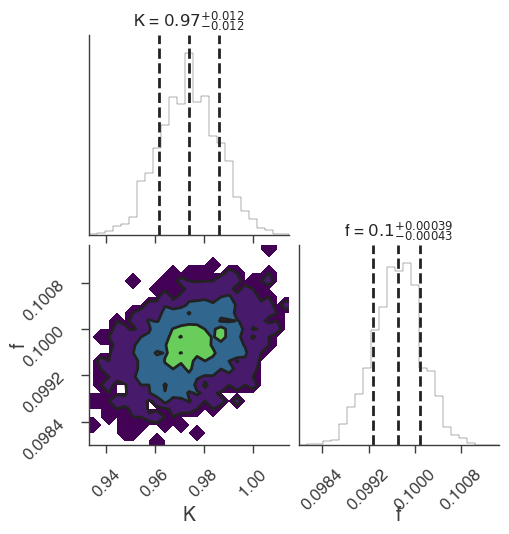

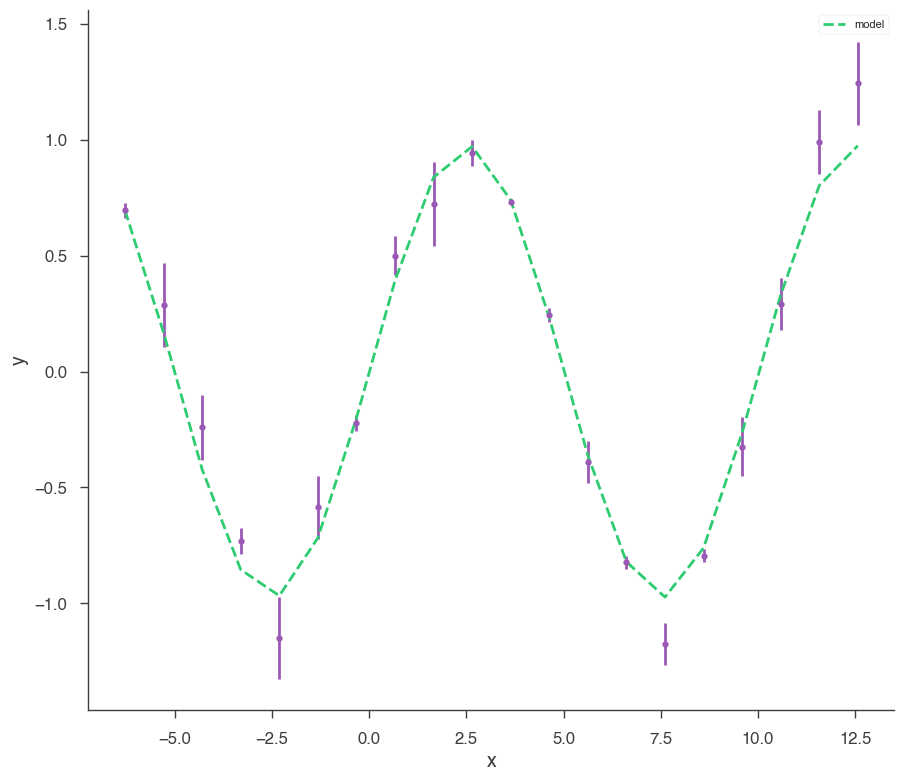

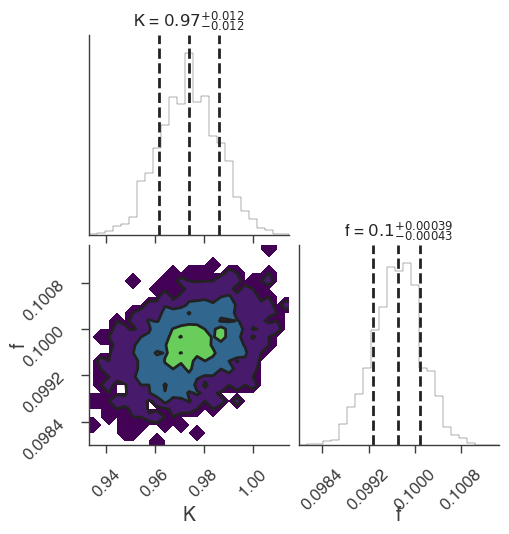

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=929006;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=932107;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

124it [00:00, 1238.39it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 142 | eff(%): 19.315 | loglstar:   -inf < -10322.919 <    inf | logz: -10330.075 +/-  0.120 | dlogz: 10339.104 >  0.010]

342it [00:00, 1789.03it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 488 | eff(%): 34.615 | loglstar:   -inf < -5329.240 <    inf | logz: -5336.832 +/-  0.123 | dlogz: 5339.039 >  0.010]   

521it [00:00, 1767.75it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 888 | eff(%): 37.536 | loglstar:   -inf < -3894.836 <    inf | logz: -3902.783 +/-  0.126 | dlogz: 3885.243 >  0.010]

698it [00:00, 1705.91it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1494 | eff(%): 35.005 | loglstar:   -inf < -3239.421 <    inf | logz: -3247.444 +/-  0.123 | dlogz: 3234.813 >  0.010]

869it [00:00, 1401.52it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 2294 | eff(%): 31.102 | loglstar:   -inf < -2650.259 <    inf | logz: -2658.876 +/-  0.130 | dlogz: 2647.887 >  0.010]

1017it [00:00, 1205.93it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 3260 | eff(%): 27.048 | loglstar:   -inf < -2124.811 <    inf | logz: -2133.682 +/-  0.131 | dlogz: 2123.024 >  0.010]

1146it [00:00, 990.63it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 4498 | eff(%): 22.929 | loglstar:   -inf < -1906.967 <    inf | logz: -1915.198 +/-  0.126 | dlogz: 1902.128 >  0.010]

1255it [00:01, 891.56it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 5722 | eff(%): 20.170 | loglstar:   -inf < -1546.931 <    inf | logz: -1556.239 +/-  0.134 | dlogz: 1544.827 >  0.010]

1351it [00:01, 725.22it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 6967 | eff(%): 18.093 | loglstar:   -inf < -1213.343 <    inf | logz: -1222.814 +/-  0.135 | dlogz: 1210.859 >  0.010]

1431it [00:01, 637.17it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 7998 | eff(%): 16.839 | loglstar:   -inf < -981.315 <    inf | logz: -990.153 +/-  0.126 | dlogz: 976.130 >  0.010]   

1501it [00:01, 559.11it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 9064 | eff(%): 15.694 | loglstar:   -inf < -861.847 <    inf | logz: -871.657 +/-  0.137 | dlogz: 859.560 >  0.010]

1561it [00:01, 484.93it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 10167 | eff(%): 14.634 | loglstar:   -inf < -767.913 <    inf | logz: -777.568 +/-  0.134 | dlogz: 764.207 >  0.010]

1613it [00:02, 437.97it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 11755 | eff(%): 13.162 | loglstar:   -inf < -692.968 <    inf | logz: -702.600 +/-  0.133 | dlogz: 688.957 >  0.010] 

1659it [00:02, 395.14it/s, batch: 0 | bound: 0 | nc: 54 | ncall: 13005 | eff(%): 12.284 | loglstar:   -inf < -639.342 <    inf | logz: -648.464 +/-  0.129 | dlogz: 633.940 >  0.010]

1700it [00:02, 375.75it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 14102 | eff(%): 11.642 | loglstar:   -inf < -593.690 <    inf | logz: -603.202 +/-  0.132 | dlogz: 588.804 >  0.010] 

1738it [00:02, 323.88it/s, batch: 0 | bound: 0 | nc: 43 | ncall: 15248 | eff(%): 11.036 | loglstar:   -inf < -550.038 <    inf | logz: -558.899 +/-  0.128 | dlogz: 543.970 >  0.010]

1771it [00:02, 265.71it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 16528 | eff(%): 10.401 | loglstar:   -inf < -524.188 <    inf | logz: -533.835 +/-  0.132 | dlogz: 519.360 >  0.010] 

1799it [00:02, 209.72it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17501 | eff(%):  9.994 | loglstar:   -inf < -503.041 <    inf | logz: -513.204 +/-  0.137 | dlogz: 499.356 >  0.010]

2012it [00:03, 553.54it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17790 | eff(%): 11.001 | loglstar:   -inf < -337.718 <    inf | logz: -347.350 +/-  0.135 | dlogz: 332.244 >  0.010]

2182it [00:03, 786.66it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18156 | eff(%): 11.696 | loglstar:   -inf < -245.636 <    inf | logz: -255.307 +/-  0.131 | dlogz: 239.676 >  0.010]

2289it [00:03, 734.22it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18334 | eff(%): 12.154 | loglstar:   -inf < -201.337 <    inf | logz: -211.297 +/-  0.135 | dlogz: 195.604 >  0.010]

2482it [00:03, 993.80it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 18646 | eff(%): 12.964 | loglstar:   -inf < -146.345 <    inf | logz: -155.796 +/-  0.130 | dlogz: 139.406 >  0.010]

2629it [00:03, 849.94it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19005 | eff(%): 13.479 | loglstar:   -inf < -108.659 <    inf | logz: -118.269 +/-  0.134 | dlogz: 101.586 >  0.010]

2847it [00:03, 1122.91it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19304 | eff(%): 14.376 | loglstar:   -inf < -71.364 <    inf | logz: -80.898 +/-  0.132 | dlogz: 63.706 >  0.010]  

3001it [00:03, 1216.83it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19684 | eff(%): 14.868 | loglstar:   -inf < -54.563 <    inf | logz: -64.417 +/-  0.133 | dlogz: 46.918 >  0.010]

3145it [00:04, 1014.83it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 19902 | eff(%): 15.415 | loglstar:   -inf < -43.288 <    inf | logz: -53.071 +/-  0.133 | dlogz: 35.257 >  0.010]

3333it [00:04, 1202.47it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20247 | eff(%): 16.065 | loglstar:   -inf < -33.369 <    inf | logz: -42.981 +/-  0.131 | dlogz: 24.833 >  0.010]

3475it [00:04, 957.40it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20525 | eff(%): 16.528 | loglstar:   -inf < -28.033 <    inf | logz: -38.047 +/-  0.133 | dlogz: 19.618 >  0.010] 

3698it [00:04, 1218.61it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 20812 | eff(%): 17.352 | loglstar:   -inf < -22.267 <    inf | logz: -31.859 +/-  0.132 | dlogz: 12.961 >  0.010]

3878it [00:04, 1349.09it/s, batch: 0 | bound: 5 | nc: 6 | ncall: 21170 | eff(%): 17.896 | loglstar:   -inf < -18.943 <    inf | logz: -28.726 +/-  0.132 | dlogz:  9.466 >  0.010]

4036it [00:04, 1096.24it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21428 | eff(%): 18.406 | loglstar:   -inf < -16.894 <    inf | logz: -26.674 +/-  0.132 | dlogz:  7.095 >  0.010]

4226it [00:04, 1267.44it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21760 | eff(%): 18.985 | loglstar:   -inf < -15.189 <    inf | logz: -24.943 +/-  0.132 | dlogz:  4.992 >  0.010]

4376it [00:05, 1030.69it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22070 | eff(%): 19.389 | loglstar:   -inf < -14.257 <    inf | logz: -24.024 +/-  0.132 | dlogz:  3.788 >  0.010]

4582it [00:05, 1243.17it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22356 | eff(%): 20.047 | loglstar:   -inf < -13.354 <    inf | logz: -23.090 +/-  0.132 | dlogz:  2.503 >  0.010]

4746it [00:05, 1333.45it/s, batch: 0 | bound: 7 | nc: 4 | ncall: 22729 | eff(%): 20.431 | loglstar:   -inf < -12.826 <    inf | logz: -22.582 +/-  0.132 | dlogz:  1.768 >  0.010]

4900it [00:05, 1088.90it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22941 | eff(%): 20.904 | loglstar:   -inf < -12.457 <    inf | logz: -22.231 +/-  0.132 | dlogz:  1.256 >  0.010]

5080it [00:05, 1242.64it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23253 | eff(%): 21.387 | loglstar:   -inf < -12.178 <    inf | logz: -21.937 +/-  0.132 | dlogz:  0.837 >  0.010]

5225it [00:05, 1013.91it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23548 | eff(%): 21.727 | loglstar:   -inf < -12.019 <    inf | logz: -21.768 +/-  0.132 | dlogz:  0.603 >  0.010]

5441it [00:05, 1253.13it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23852 | eff(%): 22.343 | loglstar:   -inf < -11.847 <    inf | logz: -21.593 +/-  0.132 | dlogz:  0.372 >  0.010]

5614it [00:06, 1361.81it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 24197 | eff(%): 22.732 | loglstar:   -inf < -11.750 <    inf | logz: -21.497 +/-  0.132 | dlogz:  0.255 >  0.010]

5771it [00:06, 1117.54it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24425 | eff(%): 23.153 | loglstar:   -inf < -11.688 <    inf | logz: -21.436 +/-  0.132 | dlogz:  0.182 >  0.010]

5952it [00:06, 1268.65it/s, batch: 0 | bound: 10 | nc: 6 | ncall: 24776 | eff(%): 23.548 | loglstar:   -inf < -11.629 <    inf | logz: -21.384 +/-  0.132 | dlogz:  0.124 >  0.010]

6099it [00:06, 1032.06it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25067 | eff(%): 23.855 | loglstar:   -inf < -11.601 <    inf | logz: -21.354 +/-  0.132 | dlogz:  0.091 >  0.010]

6309it [00:06, 1256.21it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25379 | eff(%): 24.379 | loglstar:   -inf < -11.574 <    inf | logz: -21.324 +/-  0.132 | dlogz:  0.059 >  0.010]

6480it [00:06, 1358.42it/s, batch: 0 | bound: 11 | nc: 7 | ncall: 25754 | eff(%): 24.682 | loglstar:   -inf < -11.559 <    inf | logz: -21.308 +/-  0.132 | dlogz:  0.042 >  0.010]

6636it [00:06, 1124.63it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25952 | eff(%): 25.087 | loglstar:   -inf < -11.549 <    inf | logz: -21.297 +/-  0.132 | dlogz:  0.030 >  0.010]

6825it [00:07, 1291.18it/s, batch: 0 | bound: 12 | nc: 4 | ncall: 26285 | eff(%): 25.481 | loglstar:   -inf < -11.539 <    inf | logz: -21.287 +/-  0.132 | dlogz:  0.021 >  0.010]

6974it [00:07, 1070.35it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26578 | eff(%): 25.755 | loglstar:   -inf < -11.535 <    inf | logz: -21.282 +/-  0.132 | dlogz:  0.015 >  0.010]

7186it [00:07, 1295.39it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26882 | eff(%): 26.244 | loglstar:   -inf < -11.530 <    inf | logz: -21.277 +/-  0.132 | dlogz:  0.010 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7686it [00:08, 862.06it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27382 | eff(%): 28.070 | loglstar: -13.314 < -12.651 < -12.021 | logz: -21.267 +/-  0.136 | stop:  1.462]          

7916it [00:08, 1030.80it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27679 | eff(%): 28.060 | loglstar: -13.314 < -12.646 < -12.021 | logz: -21.267 +/-  0.136 | stop:  1.462]

8110it [00:08, 1161.56it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 28081 | eff(%): 28.344 | loglstar: -13.314 < -12.305 < -12.021 | logz: -21.267 +/-  0.136 | stop:  1.462]

8279it [00:08, 1081.10it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28308 | eff(%): 28.707 | loglstar: -13.314 < -12.081 < -12.021 | logz: -21.267 +/-  0.136 | stop:  1.462]

8829it [00:08, 1849.24it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28922 | eff(%): 30.526 | loglstar: -13.314 < -11.523 < -12.021 | logz: -21.267 +/-  0.136 | stop:  1.462]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9095it [00:09, 813.55it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29221 | eff(%): 30.700 | loglstar: -13.829 < -12.763 < -13.312 | logz: -21.272 +/-  0.112 | stop:  1.094] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9460it [00:09, 746.81it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29625 | eff(%): 31.932 | loglstar: -13.829 < -11.530 < -13.312 | logz: -21.272 +/-  0.112 | stop:  0.914]

9460it [00:10, 945.22it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29625 | eff(%): 31.932 | loglstar: -13.829 < -11.530 < -13.312 | logz: -21.272 +/-  0.112 | stop:  0.914]

02:29:15 INFO      fit restored to maximum of posterior                                         ]8;id=483336;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=598670;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=494987;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=597191;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.74 +/- 0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.494566
total,-11.494566


Values of statistical measures:

,statistical measures
AIC,27.695015
BIC,28.980597
DIC,26.966689
PDIC,1.988821
log(Z),-9.236094


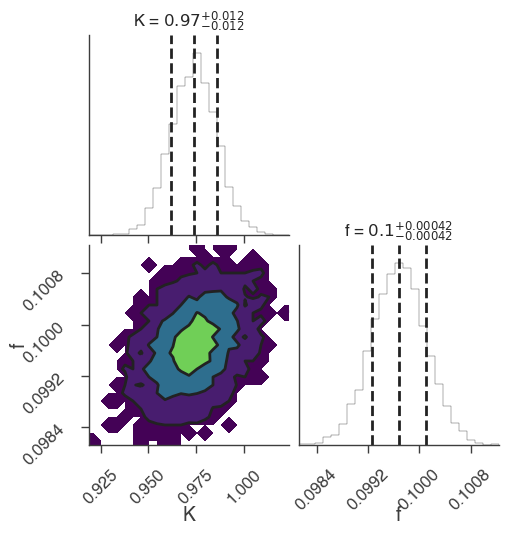

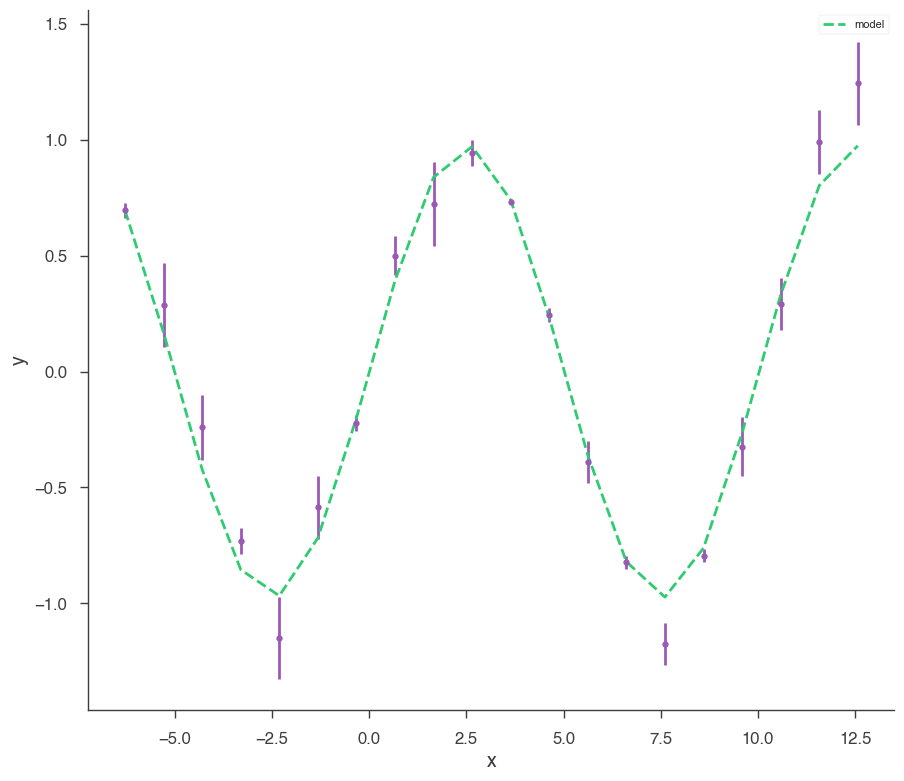

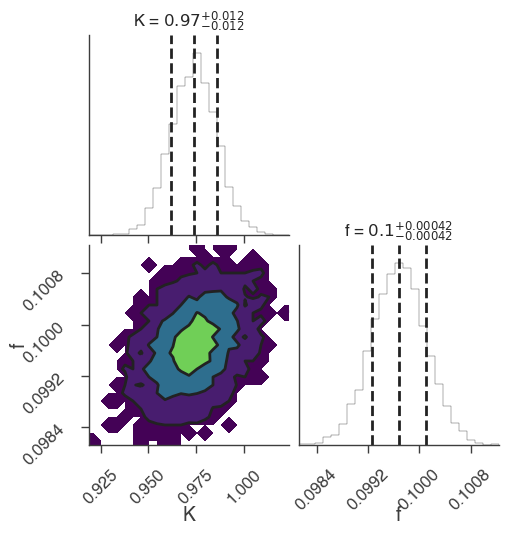

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=369119;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=348734;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:11, 55.02it/s]

Sampling progress :   2%|▏         | 14/625 [00:00<00:09, 65.81it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:09, 65.60it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:08, 66.90it/s]

Sampling progress :   6%|▌         | 37/625 [00:00<00:08, 72.04it/s]

Sampling progress :   7%|▋         | 45/625 [00:00<00:07, 72.74it/s]

Sampling progress :   8%|▊         | 53/625 [00:00<00:07, 74.45it/s]

Sampling progress :  10%|▉         | 61/625 [00:00<00:07, 75.78it/s]

Sampling progress :  11%|█         | 70/625 [00:00<00:07, 77.39it/s]

Sampling progress :  13%|█▎        | 79/625 [00:01<00:06, 79.66it/s]

Sampling progress :  14%|█▍        | 87/625 [00:01<00:06, 79.29it/s]

Sampling progress :  15%|█▌        | 95/625 [00:01<00:07, 73.47it/s]

Sampling progress :  16%|█▋        | 103/625 [00:01<00:06, 74.99it/s]

Sampling progress :  18%|█▊        | 111/625 [00:01<00:07, 73.43it/s]

Sampling progress :  19%|█▉        | 119/625 [00:01<00:07, 67.13it/s]

Sampling progress :  20%|██        | 127/625 [00:01<00:07, 68.14it/s]

Sampling progress :  21%|██▏       | 134/625 [00:01<00:07, 67.11it/s]

Sampling progress :  23%|██▎       | 141/625 [00:01<00:07, 65.54it/s]

Sampling progress :  24%|██▍       | 150/625 [00:02<00:06, 70.13it/s]

Sampling progress :  25%|██▌       | 158/625 [00:02<00:06, 70.93it/s]

Sampling progress :  27%|██▋       | 166/625 [00:02<00:06, 70.70it/s]

Sampling progress :  28%|██▊       | 174/625 [00:02<00:06, 70.81it/s]

Sampling progress :  29%|██▉       | 182/625 [00:02<00:06, 69.09it/s]

Sampling progress :  30%|███       | 190/625 [00:02<00:06, 71.27it/s]

Sampling progress :  32%|███▏      | 198/625 [00:02<00:05, 73.32it/s]

Sampling progress :  33%|███▎      | 207/625 [00:02<00:05, 76.27it/s]

Sampling progress :  35%|███▍      | 216/625 [00:02<00:05, 77.73it/s]

Sampling progress :  36%|███▌      | 224/625 [00:03<00:05, 75.48it/s]

Sampling progress :  37%|███▋      | 232/625 [00:03<00:05, 71.68it/s]

Sampling progress :  38%|███▊      | 240/625 [00:03<00:05, 71.73it/s]

Sampling progress :  40%|███▉      | 248/625 [00:03<00:05, 70.67it/s]

Sampling progress :  41%|████      | 256/625 [00:03<00:05, 72.45it/s]

Sampling progress :  42%|████▏     | 265/625 [00:03<00:04, 75.76it/s]

Sampling progress :  44%|████▎     | 273/625 [00:03<00:04, 76.06it/s]

Sampling progress :  45%|████▍     | 281/625 [00:03<00:04, 74.54it/s]

Sampling progress :  46%|████▋     | 290/625 [00:03<00:04, 77.03it/s]

Sampling progress :  48%|████▊     | 298/625 [00:04<00:04, 74.21it/s]

Sampling progress :  49%|████▉     | 306/625 [00:04<00:04, 70.86it/s]

Sampling progress :  50%|█████     | 314/625 [00:04<00:04, 71.95it/s]

Sampling progress :  52%|█████▏    | 322/625 [00:04<00:04, 72.27it/s]

Sampling progress :  53%|█████▎    | 330/625 [00:04<00:04, 70.79it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:04<00:04, 71.33it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:04<00:04, 67.62it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:04<00:03, 71.59it/s]

Sampling progress :  58%|█████▊    | 363/625 [00:05<00:03, 72.63it/s]

Sampling progress :  59%|█████▉    | 371/625 [00:05<00:03, 73.61it/s]

Sampling progress :  61%|██████    | 379/625 [00:05<00:03, 72.28it/s]

Sampling progress :  62%|██████▏   | 387/625 [00:05<00:03, 72.34it/s]

Sampling progress :  63%|██████▎   | 395/625 [00:05<00:03, 71.05it/s]

Sampling progress :  64%|██████▍   | 403/625 [00:05<00:03, 72.62it/s]

Sampling progress :  66%|██████▌   | 411/625 [00:05<00:03, 71.27it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:05<00:02, 70.61it/s]

Sampling progress :  68%|██████▊   | 427/625 [00:05<00:02, 68.40it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:06<00:02, 69.98it/s]

Sampling progress :  71%|███████   | 443/625 [00:06<00:02, 71.69it/s]

Sampling progress :  72%|███████▏  | 451/625 [00:06<00:02, 72.15it/s]

Sampling progress :  73%|███████▎  | 459/625 [00:06<00:02, 73.48it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:06<00:02, 73.07it/s]

Sampling progress :  76%|███████▌  | 475/625 [00:06<00:02, 72.82it/s]

Sampling progress :  77%|███████▋  | 483/625 [00:06<00:01, 72.52it/s]

Sampling progress :  79%|███████▊  | 491/625 [00:06<00:01, 74.38it/s]

Sampling progress :  80%|███████▉  | 499/625 [00:06<00:01, 74.98it/s]

Sampling progress :  81%|████████▏ | 508/625 [00:07<00:01, 76.71it/s]

Sampling progress :  83%|████████▎ | 516/625 [00:07<00:01, 74.63it/s]

Sampling progress :  84%|████████▍ | 524/625 [00:07<00:01, 73.78it/s]

Sampling progress :  85%|████████▌ | 532/625 [00:07<00:01, 73.52it/s]

Sampling progress :  86%|████████▋ | 540/625 [00:07<00:01, 73.19it/s]

Sampling progress :  88%|████████▊ | 549/625 [00:07<00:00, 76.26it/s]

Sampling progress :  89%|████████▉ | 557/625 [00:07<00:00, 74.03it/s]

Sampling progress :  90%|█████████ | 565/625 [00:07<00:00, 74.31it/s]

Sampling progress :  92%|█████████▏| 573/625 [00:07<00:00, 71.44it/s]

Sampling progress :  93%|█████████▎| 581/625 [00:08<00:00, 72.79it/s]

Sampling progress :  94%|█████████▍| 589/625 [00:08<00:00, 72.02it/s]

Sampling progress :  96%|█████████▌| 597/625 [00:08<00:00, 71.40it/s]

Sampling progress :  97%|█████████▋| 605/625 [00:08<00:00, 71.12it/s]

Sampling progress :  98%|█████████▊| 613/625 [00:08<00:00, 72.13it/s]

Sampling progress :  99%|█████████▉| 621/625 [00:08<00:00, 67.39it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 72.05it/s]

02:29:25 INFO      fit restored to maximum of posterior                                         ]8;id=703610;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=757491;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=230615;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=792427;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 22


Scale Factor: 1.840307


Mean Integrated Autocorrelation Time: 2.9


Effective Sample Size: 4314.62


Number of Log Probability Evaluations: 65043


Effective Samples per Log Probability Evaluation: 0.066335


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.74 +/- 0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.494556
total,-11.494556


Values of statistical measures:

,statistical measures
AIC,27.694994
BIC,28.980577
DIC,26.980123
PDIC,1.995470


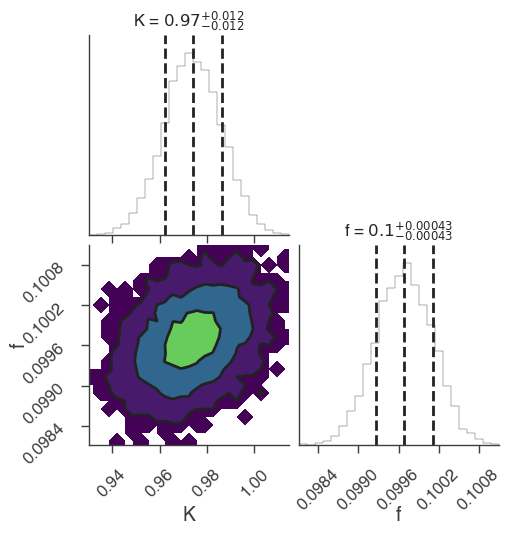

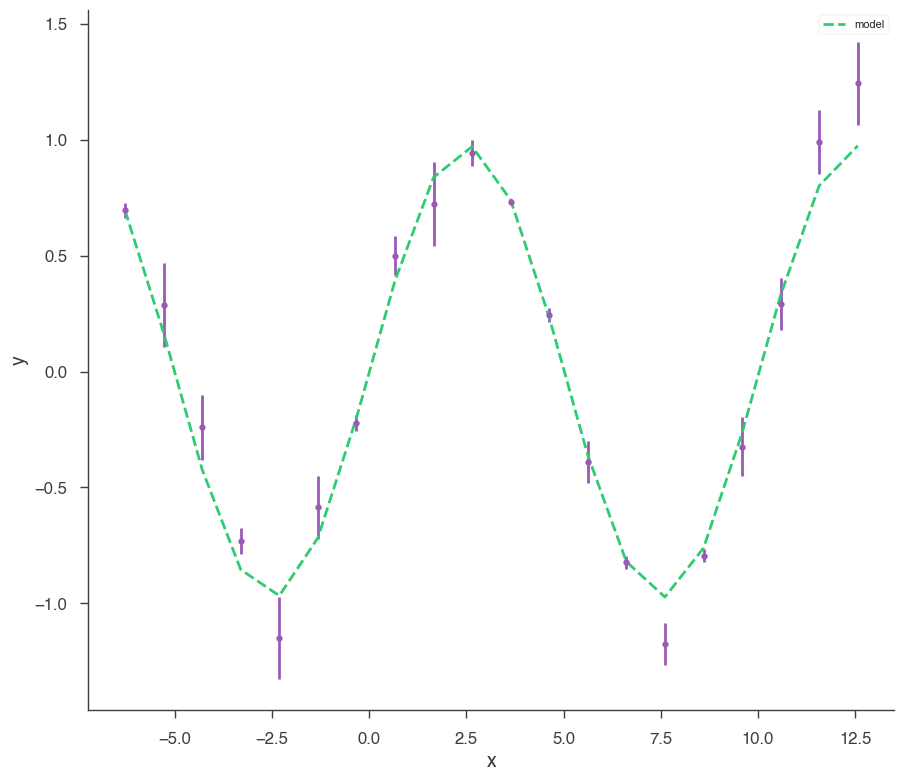

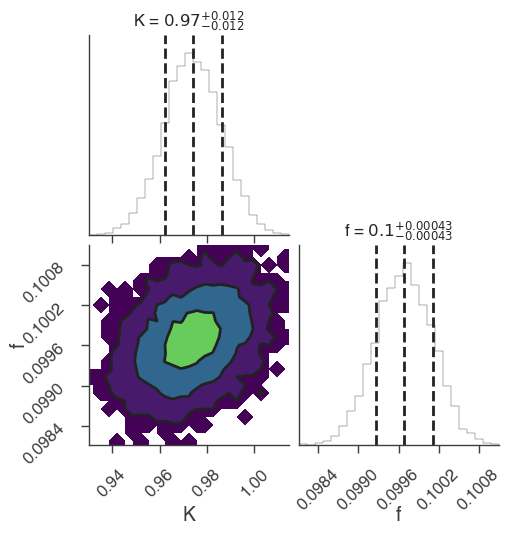

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

         INFO      sampler set to ultranest                                                ]8;id=786313;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=300687;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 7979


[ultranest]   logZ = -21.05 +- 0.1076


[ultranest] Effective samples strategy satisfied (ESS = 971.0, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


02:29:33 INFO      fit restored to maximum of posterior                                         ]8;id=371706;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=882762;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=419070;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=309717;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.74 -0.11 +0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.494638
total,-11.494638


Values of statistical measures:

,statistical measures
AIC,27.695159
BIC,28.980741
DIC,26.816169
PDIC,1.913236
log(Z),-9.133034


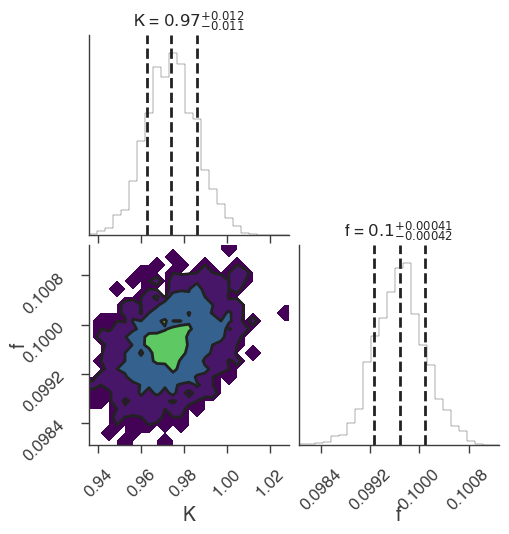

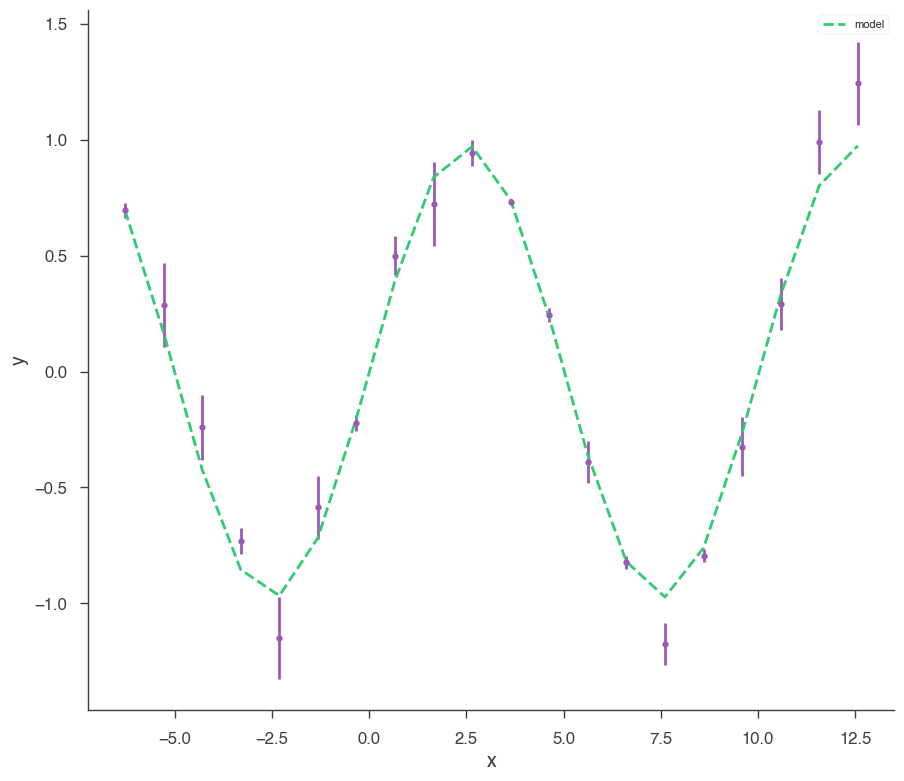

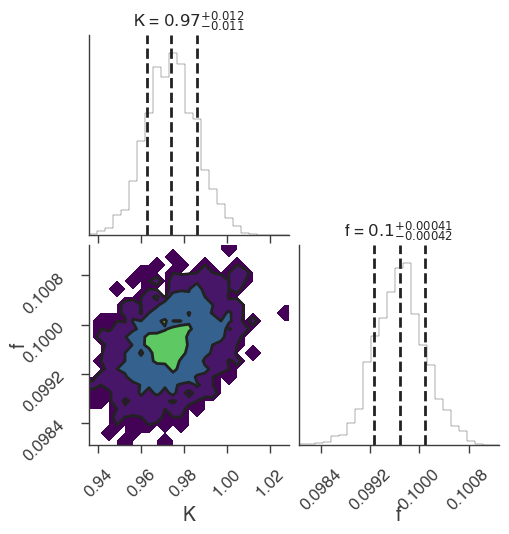

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()